<a href="https://colab.research.google.com/github/arunv8055/arunv8055/blob/main/MIS_Sales_Analysis_2022_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Importing Essential Libraries for Analysis**

In [ ]:
!pip install dash

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import sklearn
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import dash
from dash import dcc, html
import plotly.graph_objects as go
from dash import dash_table
import plotly.express as px


# **Importing Datasets and Transactions made**

In [ ]:
df = pd.read_csv('/content/Sales_Data.csv')

In [ ]:
df.head()

,Month,Date,Po No (or) DC No,Invoice No,Payment in Days,HSN Number,E Way Number,ACK Number,IRN Number,PMC NO,Location,Revenue by client segment,Profit Centre,MAIN,SUB-I,Buyer Name,Product / SKU Name,Qty,Free Qty,Qty Per Pack,Total Qty Sold,Total Qty in Tons,Units,SP / Kg,Total,Dis %,Dis Val,After Dis,GST %,GST Value,Grand Sales,Discount,Net Amount,Collection Due on,Caterogry,Value Chain,Purchase Price / Kg,Purchase Total,Margin,Margin %,Markup%,Col 1,Invoice No4,GRN No,QTY5,Price / Kg,GRN Total,Qty Diff,Per Kg Price Diff,Value Diff,Status
0,Apr,4/2/2022,DC-1-2022-23,PA-1-2022-23,42,710,0,1.52E+14,d4f7736a28ada3c605270c4b91d81712f8244a38742ecddf4f46ca012ad87043,101,Salem,Nill Rate Invoice - intra,BVB,Industries,MSME,VILLAGE FOODS,SWEETCORN COBS ( FRESH ),12910.0,0.0,1.0,12910.0,12.910,Kg,16.84,217404.0,0,0,"217,404",0,0.0,217404.4,0.0,217404.4,5/14/2022,Forward Linkage,Sweet Corn,16.04,207076.4,10328.0,0.0475,4.99,0,PA-1-2022-23,0,0,0,-,12910.0,16.84,217404.4,0
1,Apr,4/2/2022,DC-2-2022-23,PA-2-2022-23,42,710,0,1.52E+14,6239a013b6f3fba750963d62876b03f20\n4219b7d0bfe9ffe620ecdd01551ca08,101,Salem,Nill Rate Invoice - intra,BVB,Industries,MSME,VILLAGE FOODS,SWEETCORN COBS ( FRESH ),11870.0,0.0,1.0,11870.0,11.870,Kg,16.84,199891.0,0,0,"199,891",0,0.0,199890.8,0.0,199890.8,5/14/2022,Forward Linkage,Sweet Corn,16.04,190394.8,9496.0,0.0475,4.99,0,PA-2-2022-23,0,0,0,-,11870.0,16.84,199890.8,0
2,Apr,4/2/2022,DC-3-2022-23,PA-3-2022-23,42,710,0,1.52E+14,a8712b737780f423235a17491132827a34c9d937c0bb767ceb880d394186d732,100,Salem,Nill Rate Invoice - intra,BVB,Industries,MSME,VILLAGE FOODS,SWEETCORN COBS ( FRESH ),8920.0,0.0,1.0,8920.0,8.920,Kg,16.84,150213.0,0,0,"150,213",0,0.0,150212.8,0.0,150212.8,5/14/2022,Forward Linkage,Sweet Corn,16.04,143076.8,7136.0,0.0475,4.99,0,PA-3-2022-23,0,0,0,-,8920.0,16.84,150212.8,0
3,Apr,4/2/2022,DC-4-2022-23,PA-4-2022-23,42,710,0,1.52E+14,ee1d479784dc30e37877570973a4d01f93a81396b015acfe7632b186ab1623fa,99,Salem,Nill Rate Invoice - intra,BVB,Industries,MSME,VILLAGE FOODS,SWEETCORN COBS ( FRESH ),5570.0,0.0,1.0,5570.0,5.570,Kg,16.84,93799.0,0,0,"93,799",0,0.0,93798.8,0.0,93798.8,5/14/2022,Forward Linkage,Sweet Corn,16.04,89342.8,4456.0,0.0475,4.99,0,PA-4-2022-23,0,0,0,-,5570.0,16.84,93798.8,0
4,Apr,4/3/2022,DC-5-2022-23,PA-5-2022-23,42,710,0,1.52E+14,c47efba815cefce382b454c847d1da9a15568bac4c72e90902308573a77cbe9c,104,Salem,Nill Rate Invoice - intra,BVB,Industries,MSME,VILLAGE FOODS,SWEETCORN COBS ( FRESH ),16415.0,0.0,1.0,16415.0,16.415,Kg,16.84,276429.0,0,0,"276,429",0,0.0,276428.6,0.0,276428.6,5/15/2022,Forward Linkage,Sweet Corn,16.04,263296.6,13132.0,0.0475,4.99,0,PA-5-2022-23,0,0,0,-,16415.0,16.84,276428.6,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5966 entries, 0 to 5965
Data columns (total 51 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Month                      5966 non-null   object 
 1   Date                       5966 non-null   object 
 2   Po No (or) DC No           5966 non-null   object 
 3   Invoice No                 5966 non-null   object 
 4   Payment in Days            5966 non-null   int64  
 5   HSN Number                 5966 non-null   int64  
 6   E Way Number               5966 non-null   object 
 7   ACK Number                 5966 non-null   object 
 8   IRN Number                 5966 non-null   object 
 9   PMC NO                     5966 non-null   object 
 10  Location                   5966 non-null   object 
 11  Revenue by client segment  5966 non-null   object 
 12  Profit Centre              5966 non-null   object 
 13  MAIN                       5966 non-null   objec

In [ ]:
df.shape

(5966, 51)

In [ ]:
total_transactions = df.shape[0]
print(f'The total transactions Sales Dataset is {total_transactions - 1}')

The total transactions Sales Dataset is 5965


Total Number Sales transaction in 2022-2023 = ***5965***









# **1) Top 10 Sellers Performance**

**Total Sellers**

In [ ]:
unique_Sellers = df.loc[:, 'Buyer Name'].nunique()
print(f'Therewere {unique_buyers} unique Sellers')

Therewere 649 unique Sellers


**Total Net Revenue**

In [ ]:
total_revenue = df['Net Amount'].sum()

print(total_revenue)

1041101152.5660226


The Total Net Revenue from 649 buyers was ***One Hundred Four Crore Eleven Lakh One Thousand One Hundred Fifty-Two***




**Total Margin**

In [ ]:
total_Margin = df['Margin'].sum()

print(total_Margin)

52556315.66310778


Total Margin from 649 Buyers is **Fifty-two million five hundred fifty-six thousand three hundred fifteen rupees and sixty paise**

**1) Top Buyers based on their Net Revenue:**

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Grouping data by 'Buyer Name' and summing up the 'Net Amount' and 'Margin'
revenue_margin_by_buyer = df.groupby('Buyer Name').agg({'Net Amount': 'sum', 'Margin': 'sum'}).reset_index()

# Sorting the data by total revenue and selecting top ten buyers
top_ten_buyers = revenue_margin_by_buyer.sort_values(by='Net Amount', ascending=False).head(10)

# Calculate total revenue
total_revenue = top_ten_buyers['Net Amount'].sum()

# Calculate total margin
total_margin = top_ten_buyers['Margin'].sum()

# Calculate contribution of each buyer to total revenue
top_ten_buyers['Contribution to Total Revenue (%)'] = (top_ten_buyers['Net Amount'] / total_revenue) * 100

# Create a DataFrame for the top ten buyers
top_ten_buyers_df = pd.DataFrame(top_ten_buyers)

# Create a Plotly table
table_fig = go.Figure(data=[go.Table(
    header=dict(values=['Seller Name', 'Total Revenue', 'Total Margin', 'Contribution to Total Revenue (%)'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[top_ten_buyers_df['Buyer Name'],
                       top_ten_buyers_df['Net Amount'],
                       top_ten_buyers_df['Margin'],
                       top_ten_buyers_df['Contribution to Total Revenue (%)']],
               fill_color='lavender',
               align='left'))
])

# Update layout
table_fig.update_layout(title='Top Ten Buyers: Total Revenue, Total Margin, and Contribution to Total Revenue')

# Show the table
table_fig.show()


In [ ]:
# Grouping data by 'Buyer Name' and summing up the 'Net Amount' and 'Margin'
revenue_margin_by_buyer = df.groupby('Buyer Name').agg({'Net Amount': 'sum', 'Margin': 'sum'}).reset_index()

# Sorting the data by total revenue and selecting top ten buyers
top_ten_buyers = revenue_margin_by_buyer.sort_values(by='Net Amount', ascending=False).head(10)

# Calculate the percentage contribution of margin to revenue
top_ten_buyers['Margin Contribution (%)'] = (top_ten_buyers['Margin'] / top_ten_buyers['Net Amount']) * 100

# Creating a Plotly bar chart
fig = go.Figure()

# Adding a bar for each buyer showing both total revenue and total margin
fig.add_trace(go.Bar(x=top_ten_buyers['Buyer Name'],
                     y=top_ten_buyers['Net Amount'],
                     name='Total Revenue',
                     text=top_ten_buyers['Margin Contribution (%)'].round(2).astype(str) + '%',  # Add percentage text on top of the bars
                     textposition='auto'))  # Automatically position the text on top of the bars

fig.add_trace(go.Bar(x=top_ten_buyers['Buyer Name'],
                     y=top_ten_buyers['Margin'],
                     name='Total Margin',
                     opacity=0.5))  # Make the margin bars slightly transparent

# Adding labels and title
fig.update_layout(
    barmode='group',
    title='Top Ten Sellers: Total Revenue and Total Margin',
    xaxis=dict(title='Seller Name'),
    yaxis=dict(title='Amount'),
)

# Show the plot
fig.show()

**Top Buyers Based on the Margin**

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Assuming df is your DataFrame

# Grouping data by 'Buyer Name' and summing up the 'Margin'
total_margin_by_buyer = df.groupby('Buyer Name')['Margin'].sum().reset_index()

# Sorting the data by total margin and selecting top buyers
top_buyers_by_margin = total_margin_by_buyer.sort_values(by='Margin', ascending=False).head(10)

# Creating a Plotly bar chart
fig = go.Figure(go.Bar(
    x=top_buyers_by_margin['Buyer Name'],
    y=top_buyers_by_margin['Margin'],
    text=top_buyers_by_margin['Margin'],  # Data labels: total margin values
    textposition='outside',  # Position data labels outside the bars
))

# Adding labels and title
fig.update_layout(
    title='Top Buyers by Total Margin',
    xaxis=dict(title='Seller Name'),
    yaxis=dict(title='Total Margin'),
)

# Show the plot
fig.show()


Seller Contribution Percentage to the total revenue

In [ ]:
# Grouping data by 'Buyer Name' and summing up the 'Net Amount'
revenue_by_buyer = df.groupby('Buyer Name')['Net Amount'].sum().reset_index()

# Calculating total revenue
total_revenue = revenue_by_buyer['Net Amount'].sum()

# Calculating contribution of each buyer to total revenue
revenue_by_buyer['Contribution (%)'] = (revenue_by_buyer['Net Amount'] / total_revenue) * 100

# Sorting the data by contribution in descending order
revenue_by_buyer = revenue_by_buyer.sort_values(by='Contribution (%)', ascending=False)

# Grouping smaller buyers into an "Others" category
top_buyers = revenue_by_buyer.head(10)
other_revenue = revenue_by_buyer.iloc[10:]['Net Amount'].sum()
other_contribution = (other_revenue / total_revenue) * 100
top_buyers.loc[len(top_buyers)] = ['Others', other_revenue, other_contribution]

# Creating a Plotly pie chart
fig = go.Figure(go.Pie(
    labels=top_buyers['Buyer Name'],
    values=top_buyers['Contribution (%)'],
    hole=0.3,
))

# Adding title
fig.update_layout(title='Contribution of Top Seller to Total Revenue')

# Show the pie chart
fig.show()

**Purchase Freaquence**

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Assuming purchase_frequency contains the purchase frequency of each buyer

# Select top ten buyers
top_ten_buyers = purchase_frequency.head(10)

# Create a Plotly bar chart
fig = go.Figure(go.Bar(
    x=top_ten_buyers['Buyer Name'],
    y=top_ten_buyers['Purchase Frequency'],
    marker_color='skyblue',  # Set color of bars
))

# Adding labels and title to the bar chart
fig.update_layout(
    title='Top Ten Buyers: Purchase Frequency',
    xaxis=dict(title='Buyer Name'),
    yaxis=dict(title='Purchase Frequency'),
)

# Create a Plotly table
table_fig = go.Figure(data=[go.Table(
    header=dict(values=['Buyer Name', 'Purchase Frequency'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[top_ten_buyers['Buyer Name'],
                       top_ten_buyers['Purchase Frequency']],
               fill_color='lavender',
               align='left'))
])

# Update layout of the table
table_fig.update_layout(title='Top Ten Buyers: Purchase Frequency')

# Show both the bar chart and the table
fig.show()
table_fig.show()


# **2) Value Chain Analysis**

In [ ]:
Product_list = df['Product / SKU Name'].nunique()
print(f'The Number of Unique Product sold = {Product_list}')

The Number of Unique Product sold = 505


In [ ]:

# Group and sort data by each criteria
top_products = (
    df.groupby('Product / SKU Name')
    .agg({'Margin': 'sum', 'Net Amount': 'sum', 'Qty': 'sum'})
    .reset_index()
    .sort_values(by=['Margin', 'Net Amount', 'Qty'], ascending=[False, False, False])
    .head(10)  # Show top 10 products
)

# Display results in a single table
print(top_products.to_string(index=False))


   Product / SKU Name       Margin     Net Amount       Qty   
SWEETCORN COBS ( FRESH ) 1.438395e+07 4.559443e+08 19135140.00
    Raw Sweetcorn Kernal 7.053117e+06 1.021641e+08  2202844.00
            Delay Charge 6.892448e+06 6.892448e+06      147.00
       SWEETCORN SAPLING 5.496000e+06 9.290192e+07  2727510.95
          RPOU SWEETCORN 2.138863e+06 4.100932e+07  3250890.00
              Wheat Bran 2.103798e+06 3.344103e+07  1425990.00
    Raw Peeled Sweetcorn 1.555353e+06 4.560660e+07  1175125.00
De Oiled Rice Bran (DOB) 1.326741e+06 2.168208e+07  1357791.00
         Turmeric Powder 1.186659e+06 1.951555e+07   197500.00
        Coriander Powder 8.646750e+05 5.001675e+06    27000.00


In [ ]:
import plotly.graph_objects as go

# Group and sort data by each criteria
top_products = (
    df.groupby('Product / SKU Name')
    .agg({'Margin': 'sum', 'Net Amount': 'sum', 'Qty': 'sum'})
    .reset_index()
    .sort_values(by=['Margin', 'Net Amount', 'Qty'], ascending=[False, False, False])
    .head(10)  # Show top 10 products
)

# Calculate total margin, net amount, and quantity sold for all products
total_margin = top_products['Margin'].sum()
total_net_amount = top_products['Net Amount'].sum()
total_qty_sold = top_products['Qty'].sum()

# Calculate percentage contribution to total margin, net amount, and quantity sold for each product
top_products['Margin Contribution (%)'] = (top_products['Margin'] / total_margin) * 100
top_products['Net Amount Contribution (%)'] = (top_products['Net Amount'] / total_net_amount) * 100
top_products['Quantity Sold Contribution (%)'] = (top_products['Qty'] / total_qty_sold) * 100

# Create bar charts for each criteria
fig_margin = go.Figure(go.Bar(
    x=top_products['Product / SKU Name'],
    y=top_products['Margin'],
    name='Margin',
    marker_color='skyblue',
    text=top_products['Margin Contribution (%)'].round(2).astype(str) + '%',  # Add margin contribution as text on bars
    textposition='outside',  # Position text outside the bars
))

fig_margin.update_layout(
    title='Top Selling Products by Margin',
    xaxis_title='Product',
    yaxis_title='Margin'
)

fig_net_amount = go.Figure(go.Bar(
    x=top_products['Product / SKU Name'],
    y=top_products['Net Amount'],
    name='Net Amount',
    marker_color='lightgreen',
    text=top_products['Net Amount Contribution (%)'].round(2).astype(str) + '%',  # Add net amount contribution as text on bars
    textposition='outside',  # Position text outside the bars
))

fig_net_amount.update_layout(
    title='Top Selling Products by Net Amount',
    xaxis_title='Product',
    yaxis_title='Net Amount'
)

fig_quantity = go.Figure(go.Bar(
    x=top_products['Product / SKU Name'],
    y=top_products['Qty'],
    name='Quantity Sold',
    marker_color='salmon',
    text=top_products['Quantity Sold Contribution (%)'].round(2).astype(str) + '%',  # Add quantity sold contribution as text on bars
    textposition='outside',  # Position text outside the bars
))

fig_quantity.update_layout(
    title='Top Selling Products by Quantity Sold',
    xaxis_title='Product',
    yaxis_title='Quantity Sold'
)

# Show the bar charts
fig_margin.show()
fig_net_amount.show()
fig_quantity.show()


**Profit Margin By Industries**

In [ ]:
df['MAIN'].unique()

array(['Industries', 'Farm Connect Business',
       'Food Distribution Business', 'Exports'], dtype=object)

In [ ]:

# Group by MAIN and SUB-I and calculate average profit margin
profit_by_segment = df.groupby(['MAIN', 'SUB-I'])['Margin'].mean().reset_index()

# Sort segments by average profit margin
profit_by_segment = profit_by_segment.sort_values(by='Margin', ascending=False)

# Plot profit margin by customer segment using Plotly Express Sunburst chart
fig = px.sunburst(profit_by_segment,
                  path=['MAIN', 'SUB-I'],
                  values='Margin',
                  title='Profit Margin by Customer Segment (Hierarchical)',
                  color='Margin',
                  color_continuous_scale=[[0, 'rgb(255,255,255)'], [0.5, 'rgb(128,128,128)'], [1, 'rgb(0,0,0)']],  # Custom color scale
                  hover_data={'Margin': True})

fig.update_layout(coloraxis_colorbar=dict(title='Average Profit Margin'))  # Add color bar title

fig.show()


In [ ]:

# Group by customer segment and calculate average profit margin
profit_by_segment = df.groupby('MAIN')['Margin'].mean().reset_index()

# Calculate total margin
total_margin = df['Margin'].sum()

# Calculate total contribution to margin for each segment
profit_by_segment['Total Contribution to Margin'] = profit_by_segment['Margin'] / total_margin

# Sort segments by average profit margin
profit_by_segment = profit_by_segment.sort_values(by='Margin', ascending=False)

# Plot profit margin by customer segment using Plotly Express
fig = px.bar(profit_by_segment,
             x='Margin',
             y='MAIN',
             orientation='h',
             title='Profit Margin by MAIN Segment',
             text=(profit_by_segment['Total Contribution to Margin'] * 100).round(2).astype(str) + '%',  # Add total contribution as text on bars
             labels={'Margin': 'Average Profit Margin', 'MAIN': 'Customer Segment'},  # Set axis labels
             color=profit_by_segment['Margin'],  # Color bars based on average profit margin
             color_continuous_scale='Viridis',  # Choose color scale
             range_color=[profit_by_segment['Margin'].min(), profit_by_segment['Margin'].max()])  # Set color range

fig.update_layout(yaxis_categoryorder='total ascending')  # Sort bars by total contribution to margin

fig.show()


**Profit Margin by Customer Segment:**

In [ ]:
import dash
from dash import dcc, html
import plotly.graph_objects as go
from dash import dash_table

# Define the app
app = dash.Dash(__name__)

# Group by 'SUB-I' and calculate the sum of 'Net Amount' and count of sales
subi_sales_analysis = df.groupby('SUB-I').agg({'Net Amount': ['sum', 'count']}).reset_index()

# Rename the columns
subi_sales_analysis.columns = ['SUB-I', 'Total Net Amount', 'Number of Sales']

# Calculate the average net amount per sale
subi_sales_analysis['Average Net Amount per Sale'] = subi_sales_analysis['Total Net Amount'] / subi_sales_analysis['Number of Sales']

# Calculate the percentage contribution of each SUB-I
total_net_amount = subi_sales_analysis['Total Net Amount'].sum()
subi_sales_analysis['Percentage Contribution'] = (subi_sales_analysis['Total Net Amount'] / total_net_amount) * 100

# Sort the results in descending order
subi_sales_analysis = subi_sales_analysis.sort_values(by='Total Net Amount', ascending=False)

# Define colors for the pie slices
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# Define the pie chart
pie_chart = go.Figure(data=[go.Pie(labels=subi_sales_analysis['SUB-I'],
                                   values=subi_sales_analysis['Total Net Amount'],
                                   hole=0.3,
                                   textinfo='percent+label',
                                   hoverinfo='label+value',
                                   pull=[0.1, 0, 0, 0, 0, 0, 0],
                                   marker=dict(colors=colors),
                                   insidetextfont=dict(size=14, color='white'),
                                   outsidetextfont=dict(size=12, color='black'))])

# Add description to the pie chart
pie_chart.update_layout(
    title='Total Net Amount by SUB-I',
    title_x=0.5,
    annotations=[dict(text='Description: This pie chart shows the distribution of net amount by SUB-I.',
                      x=0.5, y=-0.1, showarrow=False)],
    height=400,  # Adjust the height
    width=600,   # Adjust the width
    margin=dict(l=20, r=20, t=50, b=20)  # Adjust the margins
)

# Define the bar chart
bar_chart = go.Figure(data=[go.Bar(
    x=subi_sales_analysis['SUB-I'],
    y=subi_sales_analysis['Total Net Amount'],
    marker=dict(color='skyblue'),
    name='Total Net Amount'
)])

# Update layout for the bar chart
bar_chart.update_layout(
    title='Total Net Amount by SUB-I',
    xaxis=dict(title='SUB-I', tickangle=45),
    yaxis=dict(title='Total Net Amount'),
    legend=dict(x=0.01, y=0.99),
    margin=dict(l=50, r=50, t=70, b=50),
    height=500
)

# Define the table
table = dash_table.DataTable(id='table',
                             columns=[{"name": i, "id": i} for i in subi_sales_analysis.columns],
                             data=subi_sales_analysis.to_dict('records'))

# Define the layout
app.layout = html.Div([
    html.H1("Sales Analysis Dashboard"),
    html.Div([
        html.Div([dcc.Graph(figure=pie_chart)], className='six columns'),
        html.Div([dcc.Graph(figure=bar_chart)], className='six columns')
    ], className='row'),
    html.Div([table], className='row')
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [ ]:
df['SUB-I'].unique()

array(['MSME', 'Fertilisers', 'Distributor Channel',
       'Value Added Products - D2C / B2B', 'Bakery / Kirana', 'Seeds',
       'Exports', 'Agri Tech-SoilSpectra'], dtype=object)

In [ ]:
import plotly.express as px

# Group by customer segment and calculate average profit margin
profit_by_segment = df.groupby('SUB-I')['Margin'].mean().reset_index()

# Sort segments by average profit margin
profit_by_segment = profit_by_segment.sort_values(by='Margin', ascending=False)

# Plot profit margin by customer segment using Plotly Express
fig = px.area(profit_by_segment, x='SUB-I', y='Margin', title='Profit Margin by Customer Segment',
              labels={'SUB-I': 'Customer Segment', 'Margin': 'Average Profit Margin'})
fig.update_traces(marker_color='lightblue')
fig.update_layout(xaxis_title='Customer Segment', yaxis_title='Average Profit Margin')
fig.show()


In [ ]:
import plotly.express as px

# Group by customer segment and calculate average profit margin
profit_by_segment = df.groupby('SUB-I')['Margin'].mean().reset_index()

# Sort segments by average profit margin
profit_by_segment = profit_by_segment.sort_values(by='Margin', ascending=False)

# Plot profit margin by customer segment using Plotly Express
fig = px.bar(profit_by_segment, x='Margin', y='SUB-I', orientation='h', title='Profit Margin by Customer Segment')
fig.update_traces(marker_color='lightgreen')
fig.update_layout(xaxis_title='Average Profit Margin', yaxis_title='Customer Segment')
fig.show()


**Top Product sold by Margin**

In [ ]:
import pandas as pd
import plotly.express as px

# Group and sort data by each criteria
top_products_by_month = (
    df.groupby(['Month', 'Product / SKU Name'])
    .agg({'Margin': 'sum', 'Net Amount': 'sum', 'Qty': 'sum'})
    .reset_index()
)

# Get the top product for each month based on margin, net amount, and quantity sold
top_products_by_month_margin = top_products_by_month.loc[top_products_by_month.groupby('Month')['Margin'].idxmax()]
top_products_by_month_net_amount = top_products_by_month.loc[top_products_by_month.groupby('Month')['Net Amount'].idxmax()]
top_products_by_month_quantity = top_products_by_month.loc[top_products_by_month.groupby('Month')['Qty'].idxmax()]

# Visualize top products by margin for each month
fig_margin = px.bar(top_products_by_month_margin, x='Month', y='Margin', color='Product / SKU Name',
                    title='Top Products by Margin in Each Month')
fig_margin.update_layout(xaxis_title='Month', yaxis_title='Margin')

# Visualize top products by net amount for each month
fig_net_amount = px.bar(top_products_by_month_net_amount, x='Month', y='Net Amount', color='Product / SKU Name',
                        title='Top Products by Net Amount in Each Month')
fig_net_amount.update_layout(xaxis_title='Month', yaxis_title='Net Amount')

# Visualize top products by quantity sold for each month
fig_quantity = px.bar(top_products_by_month_quantity, x='Month', y='Qty', color='Product / SKU Name',
                      title='Top Products by Quantity Sold in Each Month')
fig_quantity.update_layout(xaxis_title='Month', yaxis_title='Quantity Sold')

# Display the plots
fig_margin.show()
fig_net_amount.show()
fig_quantity.show()


**Month Wise Margin of sales**


In [ ]:
import plotly.express as px

# Assuming 'Date' is the column containing the transaction dates
# Assuming 'Margin' is the column containing the profit margins

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group by date and calculate average profit margin
profit_margin_trend = df.groupby('Date')['Margin'].mean().reset_index()

# Plot the trend using a line chart
fig = px.line(profit_margin_trend, x='Date', y='Margin', title='Profit Margin Trend Over Time')
fig.show()


In [ ]:
import plotly.express as px

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group by date and calculate average profit margin, total sales, and net amount
profit_margin_trend = df.groupby('Date').agg({'Margin': 'sum', 'Net Amount': 'sum', 'Qty': 'sum', 'SUB-I': 'first'}).reset_index()

# Plot the trend using a line chart
fig = px.line(profit_margin_trend, x='Date', y=['Margin', 'Net Amount', 'Qty'],
              title='Profit Margin, Net Amount, and Total Sales Trend Over Time',
              labels={'value': 'Amount', 'Date': 'Date', 'variable': 'Variable', 'SUB-I': 'SUB-I'})

# Add SUB-I as a trace name
fig.for_each_trace(lambda t: t.update(name=profit_margin_trend['SUB-I'].iloc[0]))

# Update layout to increase the size of the chart
fig.update_layout(height=1000, width=2000)

# Show the chart
fig.show()


**Profitable Products**: Which products generate the highest margins?

In [ ]:
# Group by 'Product / SKU Name' and calculate the total margin for each product
profitable_products = df.groupby('Product / SKU Name')['Margin'].sum().reset_index()

# Sort the products based on total margin in descending order
profitable_products = profitable_products.sort_values(by='Margin', ascending=False)

# Display the top profitable products
print("Top Profitable Products:")
print(profitable_products.head(10))  # Display top 10 profitable products


Top Profitable Products:
        Product / SKU Name        Margin   
413  SWEETCORN COBS ( FRESH )  1.438395e+07
395      Raw Sweetcorn Kernal  7.053117e+06
150              Delay Charge  6.892448e+06
414         SWEETCORN SAPLING  5.496000e+06
389            RPOU SWEETCORN  2.138863e+06
499                Wheat Bran  2.103798e+06
393      Raw Peeled Sweetcorn  1.555353e+06
149  De Oiled Rice Bran (DOB)  1.326741e+06
471           Turmeric Powder  1.186659e+06
141          Coriander Powder  8.646750e+05


**Product Contribution**: How does each product contribute to total sales and total margin?

In [ ]:
!pip install wordcloud matplotlib

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib
matplotlib.use('Agg')  # Use the 'Agg' backend for non-interactive output

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter product names with high margin contributions
high_margin_products = product_contribution.loc[product_contribution['Margin Contribution (%)'] > 0, 'Product / SKU Name']

# Combine product names into a single string
text = ' '.join(high_margin_products)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Products with High Margin Contributions')

# Save the word cloud as an image file
plt.savefig('wordcloud.png')


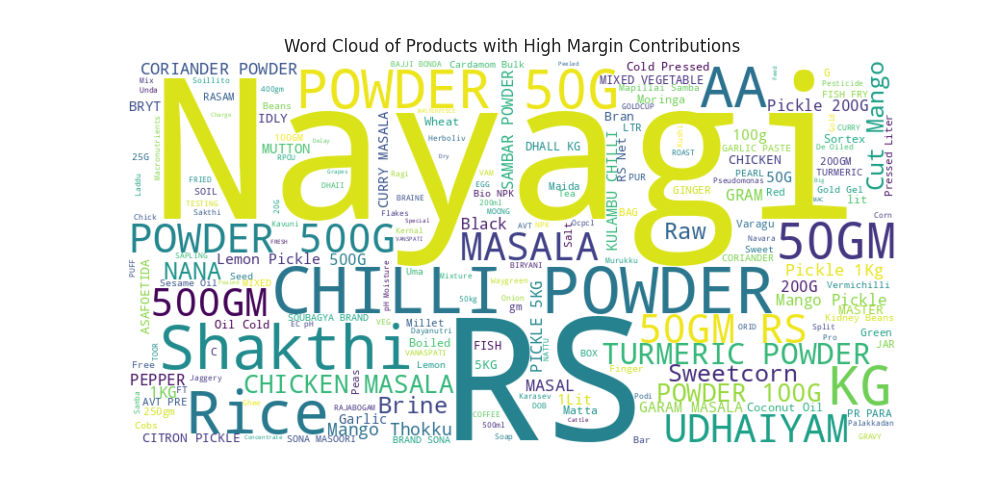

In [ ]:
import plotly.graph_objects as go

# Create a bubble chart
fig_bubble = go.Figure()

# Add bubbles for each product
fig_bubble.add_trace(go.Scatter(
    x=product_contribution['Rank'],
    y=product_contribution['Margin Contribution (%)'],
    mode='markers',
    marker=dict(
        size=product_contribution['Sales Contribution (%)'],  # Bubble size represents sales contribution
        color=product_contribution['Margin Contribution (%)'],  # Bubble color represents margin contribution
        colorscale='Viridis',  # You can choose any colorscale you prefer
        colorbar=dict(title='Margin Contribution (%)'),  # Add color bar legend
        line=dict(color='rgb(0,0,0)', width=1)  # Set bubble outline color and width
    ),
    text=product_contribution['Product / SKU Name'],  # Hover text displays product name
    hoverinfo='text+x+y'  # Show hover text including product name, x and y values
))

# Update layout
fig_bubble.update_layout(
    title='Bubble Chart of Product Ranking Based on Contribution to Total Sales and Total Margin',
    xaxis_title='Rank',
    yaxis_title='Margin Contribution (%)'
)

# Show the bubble chart
fig_bubble.show()


In [ ]:

# Sort the products based on margin contribution in descending order
product_contribution = product_contribution.sort_values(by='Margin Contribution (%)', ascending=False)

# Add a rank column
product_contribution['Rank'] = range(1, len(product_contribution) + 1)

# Create a table
fig_table = go.Figure(data=[go.Table(
    header=dict(values=['Rank', 'Product / SKU Name', 'Sales Contribution (%)', 'Margin Contribution (%)'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[product_contribution['Rank'],
                       product_contribution['Product / SKU Name'],
                       product_contribution['Sales Contribution (%)'],
                       product_contribution['Margin Contribution (%)']],
               fill_color='lavender',
               align='left'))
])

# Update layout
fig_table.update_layout(title='Product Ranking Based on Contribution to Total Sales and Total Margin')

# Show the table
fig_table.show()




**Product Categories**: Are there specific product categories (MAIN or SUB-I) that perform better than others?

In [ ]:
import plotly.graph_objects as go

# Add rank to the main_category_performance DataFrame
main_category_performance['Rank'] = main_category_performance['Margin'].rank(ascending=False).astype(int)

# Create a DataTable for MAIN categories
table_main = go.Figure(data=[go.Table(
    header=dict(values=['Rank', 'MAIN Category', 'Total Margin', 'Average Margin'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[main_category_performance['Rank'],
                       main_category_performance['MAIN'],
                       main_category_performance['Margin'],
                       main_category_performance['Average Margin']],
               fill_color='lavender',
               align='left'))
])

# Add title
table_main.update_layout(title='Performance of MAIN Categories')

# Add rank to the sub_category_performance DataFrame
sub_category_performance['Rank'] = sub_category_performance['Margin'].rank(ascending=False).astype(int)

# Create a DataTable for SUB-I categories
table_sub = go.Figure(data=[go.Table(
    header=dict(values=['Rank', 'SUB-I Category', 'Total Margin', 'Average Margin'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[sub_category_performance['Rank'],
                       sub_category_performance['SUB-I'],
                       sub_category_performance['Margin'],
                       sub_category_performance['Average Margin']],
               fill_color='lavender',
               align='left'))
])

# Add title
table_sub.update_layout(title='Performance of SUB-I Categories')

# Show the tables
table_main.show()
table_sub.show()


In [ ]:

# Plot the performance of MAIN categories
fig_main = px.bar(main_category_performance, x='MAIN', y='Margin',
                   title='Performance of MAIN Categories by Total Margin',
                   labels={'Margin': 'Total Margin', 'MAIN': 'MAIN Category'})

# Add average margin as a new trace
fig_main.add_bar(x=main_category_performance['MAIN'], y=main_category_performance['Average Margin'],
                 name='Average Margin', marker_color='orange')

# Update layout
fig_main.update_layout(barmode='group', xaxis_tickangle=-45)

# Plot the performance of SUB-I categories
fig_sub = px.bar(sub_category_performance, x='SUB-I', y='Margin',
                  title='Performance of SUB-I Categories by Total Margin',
                  labels={'Margin': 'Total Margin', 'SUB-I': 'SUB-I Category'})

# Add average margin as a new trace
fig_sub.add_bar(x=sub_category_performance['SUB-I'], y=sub_category_performance['Average Margin'],
                name='Average Margin', marker_color='orange')

# Update layout
fig_sub.update_layout(barmode='group', xaxis_tickangle=-45)

# Show the figures
fig_main.show()
fig_sub.show()


**Customer Preferences**: Do certain types of customers prefer specific products?

In [ ]:
import pandas as pd
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output


# Group the data by customer segments and product, and calculate total sales
customer_product_sales = df.groupby(['Revenue by client segment', 'Product / SKU Name'])['Net Amount'].sum().reset_index()

# Pivot the data to create a table with customer segments as rows, products as columns, and total sales as values
pivot_table = customer_product_sales.pivot(index='Revenue by client segment', columns='Product / SKU Name', values='Net Amount')

# Create the Dash app
app = dash.Dash(__name__)

# Define the layout
app.layout = html.Div([
    html.H1("Customer Preferences by Product"),
    dcc.Dropdown(
        id='segment-dropdown',
        options=[{'label': segment, 'value': segment} for segment in pivot_table.index],
        value=pivot_table.index[0],  # Default value
        clearable=False
    ),
    html.Div(id='heatmap-container')
])

# Define callback to update the heatmap based on dropdown selection
@app.callback(
    Output('heatmap-container', 'children'),
    [Input('segment-dropdown', 'value')]
)
def update_heatmap(selected_segment):
    filtered_table = pivot_table.loc[[selected_segment]]
    fig = px.imshow(filtered_table, labels=dict(x="Product", y="Customer Segment", color="Total Sales"),
                    x=filtered_table.columns, y=filtered_table.index, title=f"Customer Preferences for {selected_segment}")
    return dcc.Graph(figure=fig)

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


ModuleNotFoundError: No module named 'dash'

**Product Growth**: Are there any emerging products that are gaining popularity over time?

In [ ]:
import pandas as pd
import plotly.express as px

# Assuming 'df' contains your dataset with columns 'Date' and 'Product / SKU Name'

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group the data by product and date, and calculate total sales
product_sales = df.groupby(['Product / SKU Name', pd.Grouper(key='Date', freq='M')])['Net Amount'].sum().reset_index()

# Calculate the growth rate of sales for each product
product_sales['Sales Growth Rate'] = product_sales.groupby('Product / SKU Name')['Net Amount'].pct_change()

# Filter for products with positive growth rates, indicating emerging popularity
emerging_products = product_sales[product_sales['Sales Growth Rate'] > 0]

# Visualize the emerging products
fig = px.line(emerging_products, x='Date', y='Net Amount', color='Product / SKU Name',
              title='Emerging Products with Increasing Sales Over Time')
fig.show()


Correlation Analysis: Conduct correlation analysis to identify any relationships between product attributes (such as price, cost, or sales volume) and profit margins. This helps identify factors that influence profitability.

In [ ]:
import plotly.graph_objects as go

# Calculate correlation matrix
correlation_matrix = df[columns_for_correlation].corr()

# Create a heatmap using Plotly
fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale='Viridis',  # You can choose any colorscale you prefer
    hoverongaps=False,
    zmin=-1,  # Set the range of values for the color scale
    zmax=1
))

# Set axes labels and title
fig.update_layout(
    title="Correlation Heatmap of Product Attributes and Profit",
    xaxis_title="Product Attributes",
    yaxis_title="Product Attributes"
)

# Show the plot
fig.show()
